## Data Input/Output

This notebook introduces a typical scientific data workflow, focusing on how to read, explore, visualize, filter, and save geophysical data. The goal is to demonstrate best practices for handling real-world datasets, including file input/output, data extraction, spatial visualization, and exporting filtered results for further analysis.

How to read in and write out data files.

To read in a file, we first need to know where it's stored. This is the "path" to the file.

This is the direct address to where the file is stored... kind of like an address for a letter:

    i. Name
    ii. Street Number/Name
    iii. City
    iv. State
    v. country

In programming, the path has the "outer" one first.

path_to_cascade101 = /Earth/NAmerica/USA/OR/Eugene/E13thStreet/1535/Cascade/101/labcomputer

We'll do the same thing with files.

With computers, we need to put the path in a string

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## On the lab computers, windows:
#data_path = 'C:\\Users\\vjs\\data_for_class\\IWT009_vel.txt'

## On a mac:
data_path =  '/Users/dmelgarm/FakeQuakes/Cascadia1700_M9s/output/statics/cascadia1700_gamma.000182/statics.neu'

## Now we have a string that tells us where this file is located - it's stored in the variable data_path.

## Before we try to read it in, we need to know the format of the file. 

In [9]:
data = np.genfromtxt(data_path)
print(data)

[[          nan  2.353537e+02  4.860210e+01 -2.349400e-01 -3.669800e-01
  -9.751000e-02]
 [          nan  2.353276e+02  4.861210e+01 -2.352400e-01 -3.672000e-01
  -9.642100e-02]
 [          nan  2.353014e+02  4.862210e+01 -2.360100e-01 -3.690000e-01
  -9.484000e-02]
 ...
 [          nan  2.353180e+02  4.835440e+01 -2.803000e-01 -5.339000e-01
  -1.025200e-01]
 [          nan  2.353172e+02  4.836440e+01 -2.789800e-01 -5.269800e-01
  -1.029400e-01]
 [          nan  2.353164e+02  4.837440e+01 -2.775800e-01 -5.201700e-01
  -1.031100e-01]]


Note that there are `nan` (Not a Number) values in column 0 of the `data` array. This often happens when the data file contains non-numeric values or missing entries in that column. For example, the first column might contain text labels, headers, or empty fields that cannot be converted to numbers, so NumPy assigns `nan` to those positions when reading the file. This is common when using `np.genfromtxt`, which is designed to handle missing or invalid data gracefully.

While not strictly necessary, it is often clearer to extract individual columns from the array into separate, descriptively named variables. This makes the code easier to read and understand. For example, you might assign latitude, longitude, and deformation values to their own variables as follows:

In [10]:
lat = data[:,2]
lon = data[:,1]
z = data[:,5]

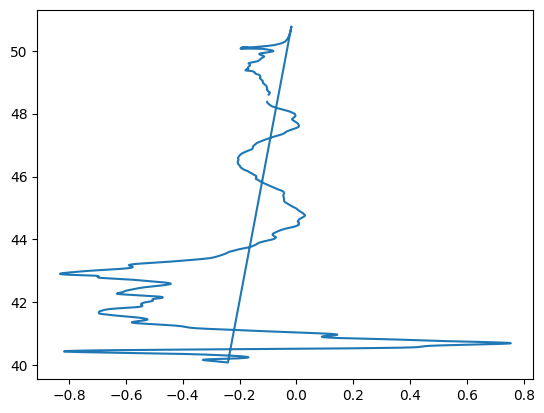

In [11]:
plt.plot(z,lat)

The line plot above looks pretty terrible because it simply connects the deformation values (`z`) to the latitude values (`lat`) in the order they appear in the data file. This does not account for the spatial relationship between the data points and can result in a plot that is difficult to interpret or visually misleading.

A better approach is to use a scatter plot, where each point is plotted at its correct longitude (`lon`) and latitude (`lat`) position, and the color of each point represents the deformation value (`z`). This provides a much clearer and more accurate visualization of how deformation varies across geographic space. Using a color map (such as `'seismic'`) and adding a colorbar further enhances the interpretability of the plot.

(231.37243, 236.30857, 39.550015, 51.306485)

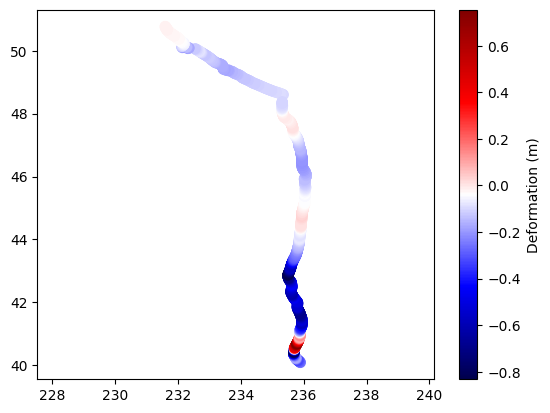

In [12]:
#looks awful, do better
plt.scatter(lon,lat,c=z,cmap='seismic',s=50)
plt.colorbar(label='Deformation (m)')
plt.axis('equal')

In [15]:
# Define the output path
subsidence_path = '/Users/dmelgarm/FakeQuakes/Cascadia1700_M9s/output/subsidence_points.txt'

# Prepare header lines
header = (
    "Subset of points with subsidence (z < 0) extracted from file:\n"
    f"{data_path}\n"
    "Columns:\n"
    "0: (unused/NaN)  1: Longitude  2: Latitude  3: east (m)  4: north(m)  5: Deformation (z, meters)\n"
)

# Extract only points with subsidence (z < 0)
subsidence_mask = z < 0
subsidence_points = data[subsidence_mask]

# Save to a new file with header
fmt = ['%.0f', '%.5f', '%.5f', '%.5e', '%.5e', '%.5e']
np.savetxt(subsidence_path, subsidence_points, header=header, comments='# ', fmt=fmt)

### Let's look at the file, how was it saved?

In [16]:
# Read and display the first few lines of the saved subsidence file
with open(subsidence_path, 'r') as f:
    for _ in range(10):
        print(f.readline().rstrip())

# Subset of points with subsidence (z < 0) extracted from file:
# /Users/dmelgarm/FakeQuakes/Cascadia1700_M9s/output/statics/cascadia1700_gamma.000182/statics.neu
# Columns:
# 0: (unused/NaN)  1: Longitude  2: Latitude  3: east (m)  4: north(m)  5: Deformation (z, meters)
#
nan 235.35370 48.60210 -2.34940e-01 -3.66980e-01 -9.75100e-02
nan 235.32760 48.61210 -2.35240e-01 -3.67200e-01 -9.64210e-02
nan 235.30140 48.62210 -2.36010e-01 -3.69000e-01 -9.48400e-02
nan 235.27530 48.63210 -2.36610e-01 -3.71190e-01 -9.45640e-02
nan 235.24920 48.64210 -2.37220e-01 -3.72870e-01 -9.45460e-02


### What's up with those numerical formats with `fmt` in NumPy's `savetxt`

When saving arrays to text files using `np.savetxt`, the `fmt` argument controls how each column of data is formatted. In the code above, `fmt` is defined as:

```python
fmt = ['%.0f', '%.5f', '%.5f', '%.5e', '%.5e', '%.5e']
```

This is a list of format strings, one for each column in the output. Each string follows standard [Python string formatting](https://docs.python.org/3/library/string.html#format-specification-mini-language):

- `%.0f`: Floating-point number with **zero digits after the decimal point** (rounded to nearest integer, but still shown as a float).
- `%.5f`: Floating-point number with **five digits after the decimal point** (fixed-point notation).
- `%.5e`: Floating-point number in **scientific notation** with five digits after the decimal point (e.g., `-2.34940e-01`).

#### How it works
- The first column (unused/NaN) is saved as an integer-like float (`%.0f`).
- The second and third columns (Longitude, Latitude) are saved with five decimal places (`%.5f`).
- The remaining columns (east, north, deformation) are saved in scientific notation with five decimal places (`%.5e`).

#### Other Common Format Options

- `%d`: Integer.
- `%i`: Integer.
- `%f`: Floating-point (default is six decimal places, e.g., `%.6f`).
- `%e`: Scientific notation (default is six decimal places, e.g., `%.6e`).
- `%g`: General format (uses `%f` or `%e` as appropriate for the value).

You can mix and match these formats in a list to control the output for each column individually. If you provide a single string (e.g., `'%.3f'`), it will be applied to all columns.

**Example:**
```python
fmt = ['%d', '%.2f', '%.3e']
```
- First column as integer, second as float with two decimals, third as scientific with three decimals.

**Reference:**  
[NumPy savetxt documentation](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html)

## Notebook Summary and Importance for Scientific Computing

This notebook demonstrates a typical scientific data workflow:

1. **Data Input/Output:**  
    - Shows how to specify file paths and read data files using NumPy (`np.genfromtxt`).
    - Discusses handling file formats and missing data (e.g., `nan` values).

2. **Data Exploration and Extraction:**  
    - Extracts relevant columns (latitude, longitude, deformation) from the loaded data array for clarity and ease of use.

3. **Data Visualization:**  
    - Illustrates the pitfalls of naive plotting (line plots that misrepresent spatial data).
    - Introduces scatter plots with color mapping to accurately visualize spatial patterns in deformation data.

4. **Data Filtering and Export:**  
    - Demonstrates how to filter data (e.g., selecting points with subsidence, `z < 0`).
    - Shows how to save filtered results to a new file with informative headers and custom formatting using `np.savetxt`.

5. **Documentation and Interpretation:**  
    - Provides markdown explanations for each step, including the rationale for formatting choices and the interpretation of results.

### Why This Matters for Scientific Computing

- **Reproducibility:**  
  The notebook format, with code and documentation interleaved, ensures that analyses can be reproduced and understood by others.

- **Transparency:**  
  Clear variable naming, step-by-step processing, and markdown explanations make the workflow transparent and accessible.

- **Data Integrity:**  
  Careful handling of file formats, missing data, and output formatting preserves the integrity and usability of scientific data.

- **Visualization:**  
  Effective data visualization is crucial for interpreting complex scientific datasets and communicating results.

- **Automation:**  
  Automating data extraction, filtering, and saving reduces manual errors and speeds up scientific analysis.

Overall, this notebook exemplifies best practices in scientific computing: clear data management, reproducible analysis, and effective communication of results.